In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, style
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set()

In [15]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)  # 한글 폰트 설정

In [3]:
df_15 = pd.read_csv(r'D:\pycharmProject\BigdataProject_AbandonedAnimal\lostAnimal_20150101_20151231_vol3.csv', encoding='CP949')
# df_16 = pd.read_csv(r'D:\pycharmProject\BigdataProject_AbandonedAnimal\lostAnimal_20160101_20161231_vol3.csv', encoding='CP949')
# df_17 = pd.read_csv(r'D:\pycharmProject\BigdataProject_AbandonedAnimal\lostAnimal_20170101_20171231_vol3.csv', encoding='CP949')
# df_18 = pd.read_csv(r'D:\pycharmProject\BigdataProject_AbandonedAnimal\lostAnimal_20180101_20181231_vol3.csv', encoding='CP949')

# 2015년 데이터

## 전체 데이터

In [4]:
df_15.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'age(before)',
       'age(after)', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeComment', 'noticeEdt', 'noticeNo', 'noticeSdt',
       'officetel', 'orgNm', 'popfile', 'processState', 'sexCd', 'specialMark',
       'weight(before)', 'weight(after)', 'kind', 'breed', 'breed_Pre',
       'happenWd', 'happenMth', 'size', 'age_u', 'processState_Pre',
       'processState_C', 'processState_A', 'processState_D', 'processState_R',
       'processState_E', 'sexCd_M', 'sexCd_F', 'sexCd_Q', 'neuterYn_Y',
       'neuterYn_N', 'neuterYn_U', 'careNm_ETC', 'careNm_H', 'careNm_C',
       'careNm_O', 'careNm_AD', 'careNm_CM'],
      dtype='object')

In [5]:
df_15['orgNm_Pre'] = df_15['orgNm'].str.split(" ").str[0]
df_15['orgNm_Pre'].value_counts()

경기도        19300
서울특별시       8859
부산광역시       6937
경상남도        5581
인천광역시       5195
충청남도        4558
강원도         3559
대구광역시       3414
전라북도        3299
경상북도        3259
대전광역시       3158
울산광역시       2986
충청북도        2955
전라남도        2943
제주특별자치도     1775
광주광역시       1683
세종특별자치시      284
Name: orgNm_Pre, dtype: int64

In [6]:
df_15=df_15.drop(['Unnamed: 0'],axis=1)
df_15=df_15.drop(['Unnamed: 0.1'],axis=1)
df_15=df_15.drop(['Unnamed: 0.1.1'],axis=1)
df_15=df_15.drop(['careTel'],axis=1)
df_15=df_15.drop(['chargeNm'],axis=1)
df_15=df_15.drop(['desertionNo'],axis=1)
df_15=df_15.drop(['filename'],axis=1)
df_15=df_15.drop(['officetel'],axis=1)

In [7]:
df_15.columns

Index(['age(before)', 'age(after)', 'careAddr', 'careNm', 'colorCd',
       'happenDt', 'happenPlace', 'kindCd', 'neuterYn', 'noticeComment',
       'noticeEdt', 'noticeNo', 'noticeSdt', 'orgNm', 'popfile',
       'processState', 'sexCd', 'specialMark', 'weight(before)',
       'weight(after)', 'kind', 'breed', 'breed_Pre', 'happenWd', 'happenMth',
       'size', 'age_u', 'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E', 'sexCd_M',
       'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
       'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
       'careNm_CM', 'orgNm_Pre'],
      dtype='object')

In [8]:
df_15.describe()

,age(after),noticeEdt,noticeSdt,weight(after),kind,happenMth
count,79745.000000,7.974500e+04,7.974500e+04,79533.00000,79745.000000,79745.000000
mean,2.586639,2.015070e+07,2.015071e+07,5.14542,0.281497,6.697034
std,3.082666,6.377380e+04,8.458330e+02,6.03758,0.474772,3.178152
min,0.000000,2.150604e+06,2.005011e+07,0.00000,0.000000,1.000000
25%,0.000000,2.015050e+07,2.015042e+07,2.00000,0.000000,4.000000
50%,2.000000,2.015072e+07,2.015071e+07,3.50000,0.000000,7.000000
75%,4.000000,2.015101e+07,2.015093e+07,5.40000,1.000000,9.000000
max,50.000000,2.051113e+07,2.016100e+07,90.00000,2.000000,12.000000


In [9]:
df_15.head(2)

,age(before),age(after),careAddr,careNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,noticeComment,...,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,orgNm_Pre
0,6개월추정(년생),0.0,충청남도 공주시 번영1로 54 (신관동),강북동물병원,흰갈색,2015-12-31,중동 사거리,[개] 믹스견,N,NaN,...,False,True,False,False,True,False,False,False,False,충청남도
1,4살추정(년생),4.0,"전라남도 순천시 중앙로 3-1 (저전동, 대한동물사랑협회)",대한동물사랑협회,흰색,2015-12-31,팔마체육관앞도로,[개] 말티즈,N,NaN,...,False,True,False,False,False,False,False,False,True,전라남도


In [10]:
df_15['kind'].value_counts()

0    58220
1    20602
2      923
Name: kind, dtype: int64

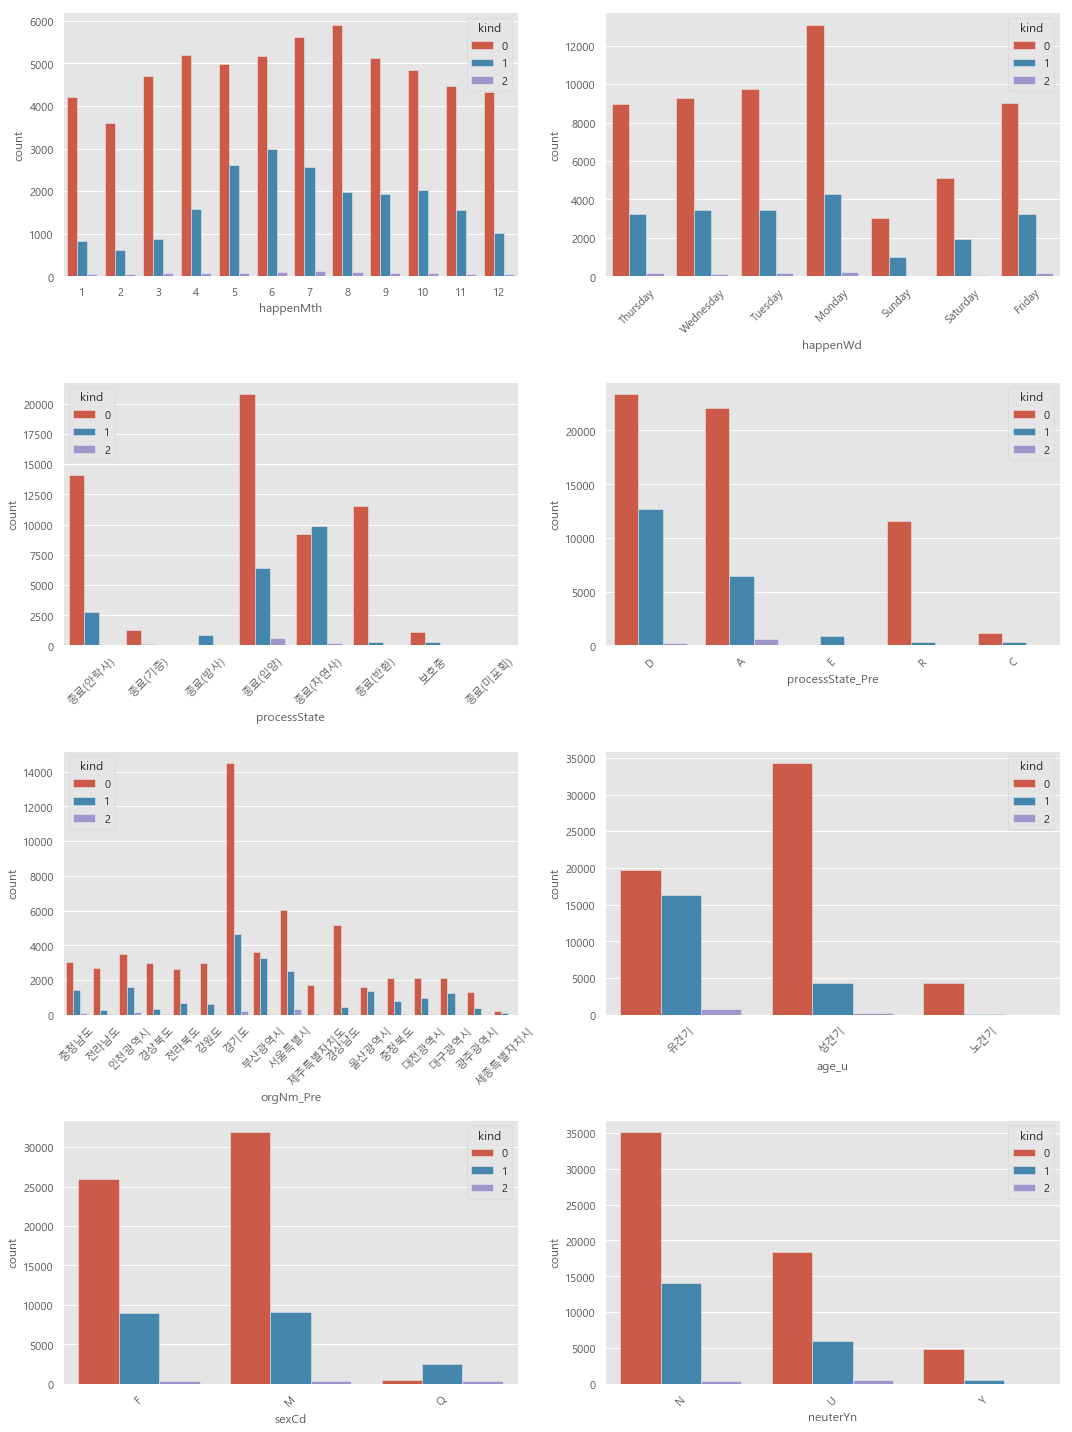

In [39]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))
p1 = sns.countplot(x="happenMth", hue='kind', data=df_15, ax=axs[0,0])
p2 = sns.countplot(x='happenWd', hue='kind', data=df_15, ax=axs[0,1])
p2.set_xticklabels(p2.get_xticklabels(), rotation=45)
p5 = sns.countplot(x='processState', hue='kind', data=df_15, ax=axs[1,0])
p5.set_xticklabels(p5.get_xticklabels(), rotation=45)
p3 = sns.countplot(x='processState_Pre', hue='kind', data=df_15, ax=axs[1,1])
p3.set_xticklabels(p3.get_xticklabels(), rotation=45)
p4 = sns.countplot(x='orgNm_Pre', hue='kind', data=df_15, ax=axs[2,0])
p4.set_xticklabels(p4.get_xticklabels(), rotation=45)
p6 = sns.countplot(x='age_u', hue='kind', data=df_15, ax=axs[2,1])
p6.set_xticklabels(p6.get_xticklabels(), rotation=45)
p7 = sns.countplot(x='sexCd', hue='kind', data=df_15, ax=axs[3,0])
p7.set_xticklabels(p7.get_xticklabels(), rotation=45)
p8 = sns.countplot(x='neuterYn', hue='kind', data=df_15, ax=axs[3,1])
p8.set_xticklabels(p8.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## 종류가 '개'인 데이터

In [29]:
df_dog15 = df_15.loc[df_15['kind']==0, :]  # kind가 0인 데이터 '개'
df_dog15.head(2)

,age(before),age(after),careAddr,careNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,noticeComment,...,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,orgNm_Pre
0,6개월추정(년생),0.0,충청남도 공주시 번영1로 54 (신관동),강북동물병원,흰갈색,2015-12-31,중동 사거리,[개] 믹스견,N,NaN,...,False,True,False,False,True,False,False,False,False,충청남도
1,4살추정(년생),4.0,"전라남도 순천시 중앙로 3-1 (저전동, 대한동물사랑협회)",대한동물사랑협회,흰색,2015-12-31,팔마체육관앞도로,[개] 말티즈,N,NaN,...,False,True,False,False,False,False,False,False,True,전라남도


In [30]:
df_dog15.describe()

,age(after),noticeEdt,noticeSdt,weight(after),kind,happenMth
count,58220.000000,5.822000e+04,5.822000e+04,58166.000000,58220.0,58220.000000
mean,3.273081,2.015063e+07,2.015070e+07,6.469085,0.0,6.610924
std,3.210152,7.463259e+04,8.272507e+02,6.468253,0.0,3.290419
min,0.000000,2.150604e+06,2.005011e+07,0.000000,0.0,1.000000
25%,1.000000,2.015042e+07,2.015041e+07,3.000000,0.0,4.000000
50%,3.000000,2.015072e+07,2.015071e+07,4.000000,0.0,7.000000
75%,5.000000,2.015101e+07,2.015093e+07,7.000000,0.0,9.000000
max,50.000000,2.051113e+07,2.016100e+07,80.000000,0.0,12.000000


In [31]:
# df_dog15['breed_Pre'].value_counts()
df_dog15['processState_Pre'].value_counts()
# processState_C = 보호중
# processState_A = 종료(입양), 종료(기증)
# processState_D = 종료(자연사),종료(안락사)
# processState_R = 종료(반환)
# processState_E = 종료(방사),종료(미포획)

D    23382
A    22059
R    11571
C     1151
E       57
Name: processState_Pre, dtype: int64

In [32]:
d_dog = df_dog15['processState_D'].sum()  # 종료(자연사),종료(안락사)
d_dog

23382

In [33]:
a_dog = df_dog15['processState_A'].sum()  # 종료(입양), 종료(기증)
a_dog

22059

In [34]:
r_dog = df_dog15['processState_R'].sum()  # 종료(반환)
r_dog

11571

In [35]:
c_dog = df_dog15['processState_C'].sum()
c_dog

1151

In [36]:
e_dog = df_dog15['processState_E'].sum()
e_dog

57

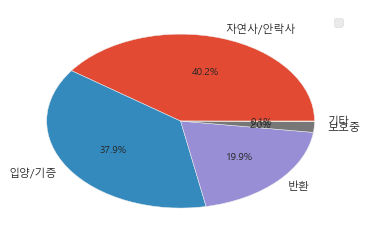

In [37]:
style.use('ggplot')

labels = ['자연사/안락사', '입양/기증', '반환', '보호중', '기타']
ratio = [d_dog, a_dog, r_dog, c_dog, e_dog]

plt.legend(ratio)

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

### processState 카테고리별 그래프

In [41]:
df_dog_D15 = df_dog15.loc[df_dog15['processState_D']==True, :]  # 종료(자연사),종료(안락사)
df_dog_A15 = df_dog15.loc[df_dog15['processState_A']==True, :]
df_dog_R15 = df_dog15.loc[df_dog15['processState_R']==True, :]

In [42]:
df_dog_D15.columns

Index(['age(before)', 'age(after)', 'careAddr', 'careNm', 'colorCd',
       'happenDt', 'happenPlace', 'kindCd', 'neuterYn', 'noticeComment',
       'noticeEdt', 'noticeNo', 'noticeSdt', 'orgNm', 'popfile',
       'processState', 'sexCd', 'specialMark', 'weight(before)',
       'weight(after)', 'kind', 'breed', 'breed_Pre', 'happenWd', 'happenMth',
       'size', 'age_u', 'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E', 'sexCd_M',
       'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
       'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
       'careNm_CM', 'orgNm_Pre'],
      dtype='object')

In [43]:
df_dog_D15['sexCd'].value_counts()

M    12581
F    10554
Q      247
Name: sexCd, dtype: int64

In [44]:
df_dog_D15['age_u'].value_counts()

성견기    13246
유견기     7642
노견기     2494
Name: age_u, dtype: int64

In [45]:
df_dog_D15['neuterYn'].value_counts()

N    13438
U     8507
Y     1437
Name: neuterYn, dtype: int64

In [46]:
df_dog_D15['size'].value_counts()

소형     12227
초소형     7584
중형      3280
대형       280
Name: size, dtype: int64

In [47]:
df_dog_D15['orgNm_Pre'].value_counts()

경기도        5868
서울특별시      2351
경상남도       1894
부산광역시      1663
인천광역시      1550
충청남도       1426
전라북도       1266
경상북도       1197
제주특별자치도    1044
강원도         973
충청북도        944
대구광역시       908
전라남도        793
대전광역시       744
울산광역시       393
광주광역시       259
세종특별자치시     109
Name: orgNm_Pre, dtype: int64

In [48]:
breed_T10 = df_dog_D15['breed_Pre'].value_counts().head(10)
breed_T10

믹스견        13932
말티즈         2466
푸들          1520
시츄          1339
요크셔 테리어      909
진도견          871
코카 스파니엘      339
슈나우져         292
미니어쳐 핀셔      234
스피츠          229
Name: breed_Pre, dtype: int64

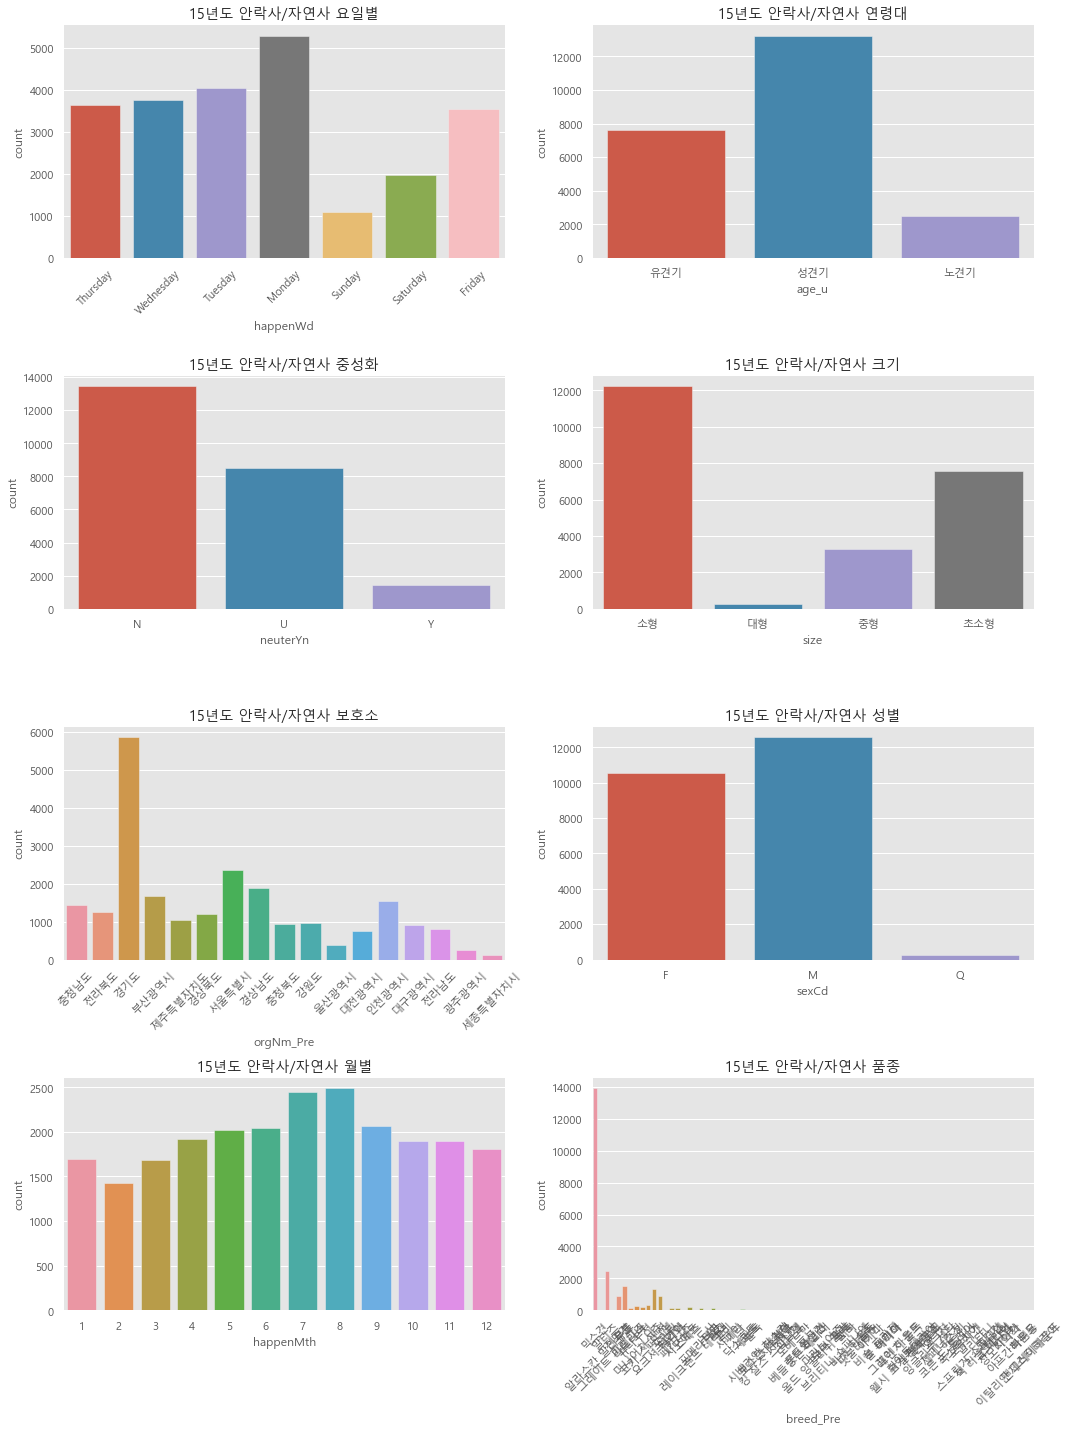

In [52]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))

p1 = sns.countplot(x='happenWd', data=df_dog_D15, ax=axs[0,0])
p1.set_title("15년도 안락사/자연사 요일별")
p1.set_xticklabels(p1.get_xticklabels(), rotation=45)
p2 = sns.countplot(x='age_u', data=df_dog_D15, ax=axs[0,1])
p2.set_title("15년도 안락사/자연사 연령대")
p3 = sns.countplot(x='neuterYn', data=df_dog_D15, ax=axs[1,0])
p3.set_title("15년도 안락사/자연사 중성화")
p4 = sns.countplot(x='size', data=df_dog_D15, ax=axs[1,1])
p4.set_title("15년도 안락사/자연사 크기")
p5 = sns.countplot(x='orgNm_Pre', data=df_dog_D15,ax=axs[2,0])
p5.set_title("15년도 안락사/자연사 보호소")
p5.set_xticklabels(p5.get_xticklabels(),rotation=45)
p6 = sns.countplot(x='sexCd', data=df_dog_D15, ax=axs[2,1])
p6.set_title("15년도 안락사/자연사 성별")
p7 = sns.countplot(x='happenMth', data=df_dog_D15,ax=axs[3,0])
p7.set_title("15년도 안락사/자연사 월별")
p8 = sns.countplot(x='breed_Pre', data=df_dog_D15, ax=axs[3,1])
p8.set_title("15년도 안락사/자연사 품종")
p8.set_xticklabels(p8.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

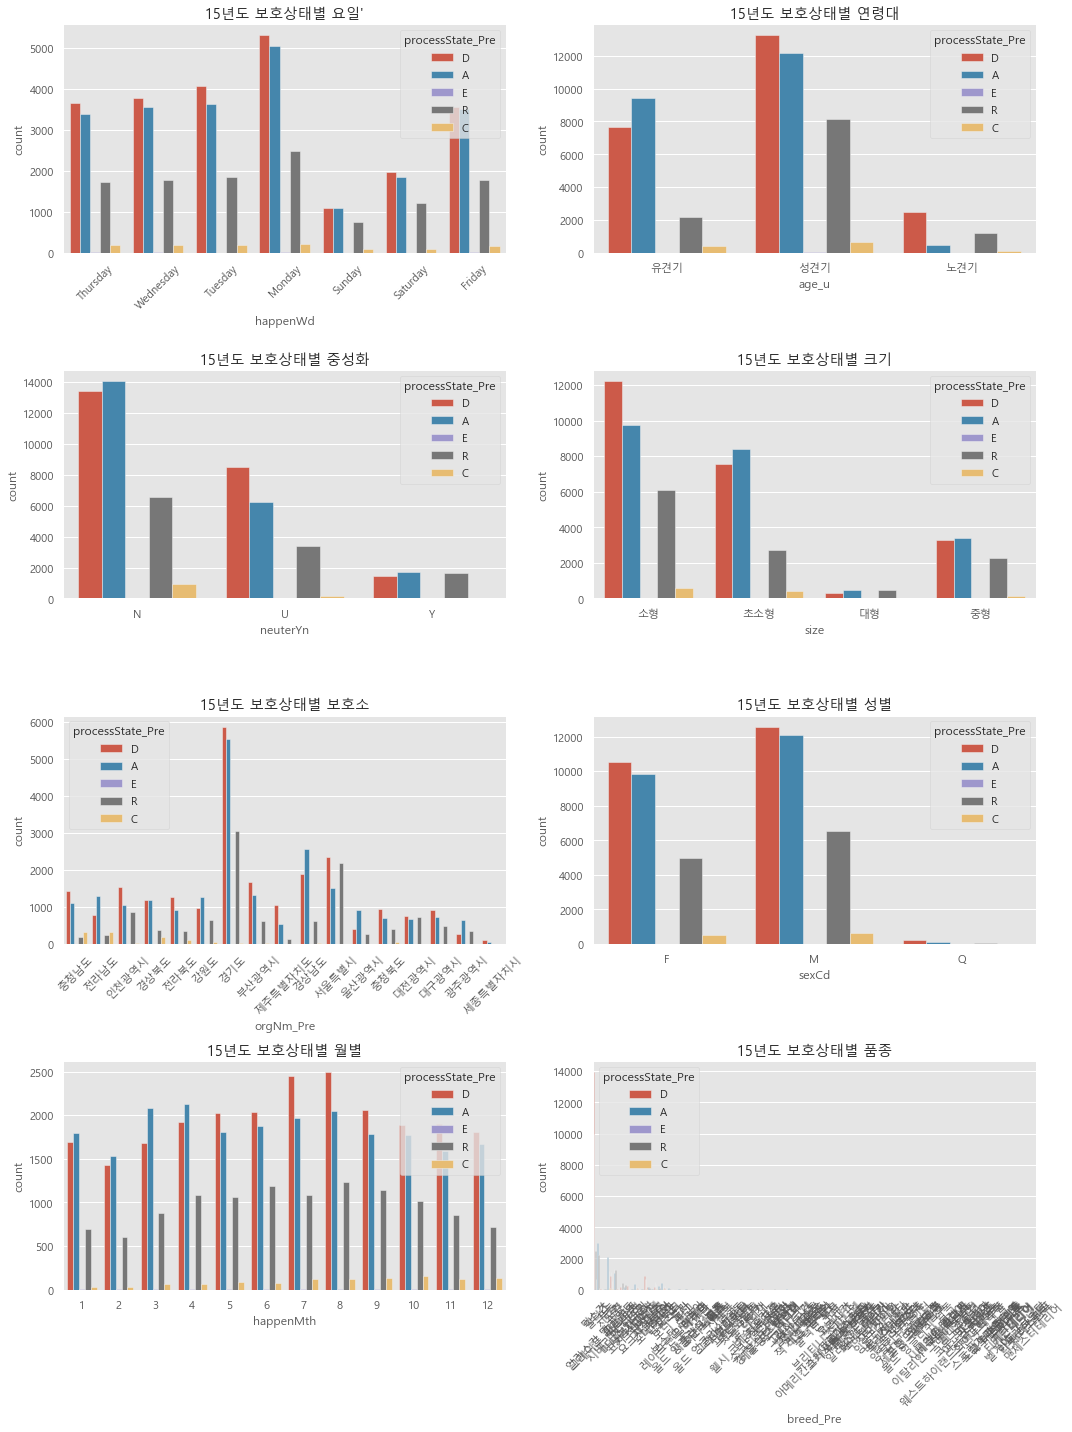

In [53]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))

p1 = sns.countplot(x='happenWd', hue='processState_Pre', data=df_dog15, ax=axs[0,0])
p1.set_title("15년도 보호상태별 요일'")
p1.set_xticklabels(p1.get_xticklabels(), rotation=45)
p2 = sns.countplot(x='age_u', hue='processState_Pre', data=df_dog15, ax=axs[0,1])
p2.set_title("15년도 보호상태별 연령대")
p3 = sns.countplot(x='neuterYn', hue='processState_Pre', data=df_dog15, ax=axs[1,0])
p3.set_title("15년도 보호상태별 중성화")
p4 = sns.countplot(x='size', hue='processState_Pre', data=df_dog15, ax=axs[1,1])
p4.set_title("15년도 보호상태별 크기")
p5 = sns.countplot(x='orgNm_Pre', hue='processState_Pre', data=df_dog15,ax=axs[2,0])
p5.set_title("15년도 보호상태별 보호소")
p5.set_xticklabels(p5.get_xticklabels(),rotation=45)
p6 = sns.countplot(x='sexCd', hue='processState_Pre', data=df_dog15, ax=axs[2,1])
p6.set_title("15년도 보호상태별 성별")
p7 = sns.countplot(x='happenMth', hue='processState_Pre', data=df_dog15,ax=axs[3,0])
p7.set_title("15년도 보호상태별 월별")
p8 = sns.countplot(x='breed_Pre', hue='processState_Pre', data=df_dog15, ax=axs[3,1])
p8.set_title("15년도 보호상태별 품종")
p8.set_xticklabels(p8.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## 종류가 '고양이'인 데이터

In [ ]:
df_cat15 = df_15.loc[df_15['kind']==1, :]  # kind가 0인 데이터 '고양이'
df_cat15.head(2)

In [ ]:
df_cat15.describe()

In [ ]:
# df_cat15['breed_Pre'].value_counts()
df_cat15['processState_Pre'].value_counts()
# processState_C = 보호중
# processState_A = 종료(입양), 종료(기증)
# processState_D = 종료(자연사),종료(안락사)
# processState_R = 종료(반환)
# processState_E = 종료(방사),종료(미포획)

In [ ]:
d_cat = df_cat15['processState_D'].sum()
d_cat

In [ ]:
a_cat = df_cat15['processState_A'].sum()
a_cat

In [ ]:
r_cat = df_cat15['processState_R'].sum()
r_cat

In [ ]:
c_cat = df_cat15['processState_C'].sum()
c_cat

In [ ]:
e_cat = df_cat15['processState_E'].sum()
e_cat

In [ ]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)  # 한글 폰트 설정

style.use('ggplot')

labels = ['자연사/안락사', '입양/기증', '반환', '보호중', '기타']
ratio = [d_cat, a_cat, r_cat, c_cat, e_cat]

plt.legend(ratio)

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

### '안락사/자연사' 데이터

In [ ]:
df_dog_D15['age(after)'].value_counts().head()

In [ ]:
fig = plt.gcf()
plt.hist(df_dog_D15['age(after)'], bins=30)  # '개'의 연령별 히스토그램
plt.show()

In [ ]:
df_dog_D15['age_u'].value_counts()